In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier

In [95]:
curricula_vitae = pd.read_csv(r'W:\CSV\curricula_vitae.csv', sep=';')

C:\Users\vshil\AppData\Local\Temp\ipykernel_8108\2344081476.py:1: DtypeWarning: Columns (0,11,55,56,57,58,61) have mixed types. Specify dtype option on import or set low_memory=False.
  curricula_vitae = pd.read_csv(r'W:\CSV\curricula_vitae.csv', sep=';')


In [96]:
curricula_vitae

,abilympics_status,abilympics_participation,add_certificates,add_certificates_modified,additional_skills,birthday,birthday_mistake,business_trips,busy_type,country,date_creation,date_inactivation,date_last_updated,date_modify_inner_info,date_publish,date_time_publish,drive_licences,driver_licence_a,driver_licence_b,driver_licence_c,driver_licence_d,driver_licence_e,education_type,experience,experience_mistake,gender,id_candidate,id_cv,id_user_inner_info,inactive,industry_code,inner_info_deleted,inner_info_fullness_rate,inner_info_status,inner_info_visibility,locality,nark_certificate,nark_inspection_status,other_info,other_info_modified,position_name,profession_code,region_code,relocation,retraining_capability,salary,schedule_type,schedule_type_1,schedule_type_2,schedule_type_3,schedule_type_4,schedule_type_5,schedule_type_6,skills,time_publish,worldskills_international_name,worldskills_is_international,worldskills_russian_name,worldskills_skill_abbreviation,worldskills_type,worldskills_inspection_status,worldskills_inspection_status_code
0,NaN,NaN,NaN,NaN,"Коммуникабельность, дипломатичность, ответстве...",NaN,NaN,0.0,Полная занятость,Российская Федерация,2018-02-12,2019-02-18,2018-10-25,2018-02-12,2018-02-12,2018-02-12 16:48:18,NaN,0,0,0,0,0,NaN,4.0,0,NaN,71a19a60-0fdf-11e8-860a-ef76bd2a03c1,b2ac2f0e-0feb-11e8-860a-ef76bd2a03c1,6c440150-1ea6-11e7-8b66-5d9e90ab9534,1,DeskWork,f,91.0,Одобрено,1.0,2.300000e+12,NaN,NaN,Трудовая деятельность началась с должности сек...,Трудовая деятельность началась с должности сек...,"Делопроизводитель, офис-менеджер, администратор",NaN,2.300000e+12,0.0,1.0,25000.0,Полный рабочий день,0,0,0,0,1,0,"Офисные программы Li e Office, Word, Excel. 1 ...",16:48:18,NaN,NaN,NaN,NaN,NaN,Не применимо,NaN
1,NaN,NaN,NaN,NaN,"Честность, обучаемость, любознательность, акку...",NaN,NaN,0.0,Полная занятость,Российская Федерация,2018-03-29,2019-02-18,2018-12-22,2018-12-19,2018-12-19,2018-12-19 15:38:35,NaN,0,0,0,0,0,NaN,11.0,0,NaN,53ff77c0-a289-11e7-ac45-736ab11edb0c,1d89b050-333b-11e8-b81f-736ab11edb0c,d07779a0-1e61-11e5-8442-1ff705945672,1,DeskWork,f,92.0,Одобрено,1.0,3.600000e+12,NaN,NaN,NaN,NaN,Оператор 1с,NaN,3.600000e+12,0.0,1.0,15000.0,Полный рабочий день,0,0,0,0,1,0,Правильное распределение и хранение документов...,15:38:35,NaN,NaN,NaN,NaN,NaN,Не применимо,NaN
2,NaN,NaN,NaN,NaN,"Дисциплинирована, пунктуальна, внимательна, от...",NaN,NaN,0.0,Полная занятость,Российская Федерация,2017-11-20,2019-02-18,2018-01-02,2017-11-21,2017-11-21,2017-11-21 06:49:18,NaN,0,0,0,0,0,NaN,0.0,0,NaN,629bcf80-cde6-11e7-bf93-037acc02728d,06e28f24-cde7-11e7-a533-9122a281f90e,a69177d0-218f-11e6-a9d7-5d9e90ab9534,1,Marketing,f,76.0,Одобрено,1.0,7.200000e+12,NaN,NaN,NaN,NaN,"Социолог , маркетолог, аналитик",265312.0,7.200000e+12,0.0,1.0,25000.0,"Полный рабочий день,Сменный график",0,0,0,0,1,1,Способность использовать знание методов и теор...,06:49:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,"Коммуникабельная,активная,ответсвенная,быстро ...",NaN,NaN,0.0,Полная занятость,Российская Федерация,2017-03-20,2019-02-18,2018-09-27,2018-07-11,2017-03-20,2017-03-20 09:36:45,NaN,0,0,0,0,0,NaN,6.0,0,NaN,3eed0830-874a-11e6-aa6f-4376a32b3f45,bb94f6c0-0d0c-11e7-a035-736ab11edb0c,02b92290-2c88-11e5-9830-1ff705945672,1,NotQualification,f,73.0,Одобрено,1.0,7.100200e+12,NaN,NaN,NaN,NaN,Помощник воспитателя,NaN,7.100000e+12,0.0,1.0,10000.0,Полный рабочий день,0,0,0,0,1,0,NaN,09:36:45,NaN,NaN,NaN,NaN,NaN,Не применимо,NaN
4,NaN,NaN,NaN,NaN,"Системное мышление, коммуникабельность, интуит...",NaN,NaN,0.0,Полная занятость,Российская Федерация,2018-12-18,2019-02-18,2018-12-22,2018-12-19,2018-12-19,2018-12-19 08:22:51,[B],0,1,0,0,0,NaN,6.0,0,NaN,797ab8e0-0217-11e9-92e6-037acc02728d,117200b0-02de-11e9-ac69-e37b4be0b9ed,dc171d60-46a5-11e7-8b66-5d9e90ab9534,1,Transport,f,81.0,Одобрено,1.0,4.301300e+12,NaN,NaN,NaN,NaN,Логистик,NaN,4.300000e+12,0.0,1.0,20000.0,Полный рабочий день,0,0,0,0,1,0,"Уверенный пользователь ПК: MsWord, MsExcel, Зн...",08:22:51,NaN,NaN

In [97]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)
curricula_vitae.isna().sum()

abilympics_status                     10580192
abilympics_participation              10573585
add_certificates                       9699055
add_certificates_modified              9699055
additional_skills                      5301615
birthday                               2774941
birthday_mistake                       2437634
business_trips                         2751413
busy_type                                   39
country                                      1
date_creation                            13347
date_inactivation                      5630018
date_last_updated                            0
date_modify_inner_info                   13348
date_publish                                 3
date_time_publish                            3
drive_licences                         6802359
driver_licence_a                             0
driver_licence_b                             0
driver_licence_c                             0
driver_licence_d                             0
driver_licenc

In [98]:
curriculum_vitae = curricula_vitae.drop(['abilympics_status', 'abilympics_participation', 'add_certificates', 'add_certificates_modified', 'nark_certificate', 'nark_inspection_status', 'other_info', 'other_info_modified', 'worldskills_international_name', 'worldskills_international_name', 'worldskills_is_international', 'worldskills_russian_name', 'worldskills_skill_abbreviation', 'worldskills_type', 'worldskills_inspection_status', 'worldskills_inspection_status_code'], axis=1)

In [99]:
mask = curriculum_vitae['inner_info_status'].isin(['Одобрено', 'Не одобрено'])
curriculum_vitae = curriculum_vitae.loc[mask].dropna(subset=['inner_info_status'])

In [100]:
curriculum_vitae['inner_info_status'] = curriculum_vitae['inner_info_status'].replace({'Одобрено': 1, 'Не одобрено': 0})

In [202]:
vitae = curriculum_vitae.loc[:, ['inner_info_status', 'inner_info_fullness_rate', 'salary', 'birthday', 'birthday_mistake', 'industry_code', 'region_code']]

In [203]:
vitae

,inner_info_status,inner_info_fullness_rate,salary,birthday,birthday_mistake,industry_code,region_code
0,1,91.0,25000.0,NaN,NaN,DeskWork,2.300000e+12
1,1,92.0,15000.0,NaN,NaN,DeskWork,3.600000e+12
2,1,76.0,25000.0,NaN,NaN,Marketing,7.200000e+12
3,1,73.0,10000.0,NaN,NaN,NotQualification,7.100000e+12
4,1,81.0,20000.0,NaN,NaN,Transport,4.300000e+12
...,...,...,...,...,...,...,...
10580882,1,72.0,12000.0,NaN,NaN,StateServices,2.000000e+11
10580883,1,47.0,30000.0,1989.0,0.0,HumanRecruitment,2.300000e+12
10580884,1,84.0,20000.0,NaN,NaN,BuldindRealty,4.800000e+12
10580885,1,78.0,12000.0,NaN,NaN,Agricultural,3.700000e+12


In [204]:
vitae[vitae['inner_info_status'] == 0]

,inner_info_status,inner_info_fullness_rate,salary,birthday,birthday_mistake,industry_code,region_code
145,0,73.0,40000.0,NaN,NaN,Industry,6.900000e+12
721,0,97.0,50000.0,NaN,NaN,Industry,2.300000e+12
1036,0,96.0,12000.0,NaN,NaN,DeskWork,7.500000e+12
1243,0,0.0,15000.0,NaN,NaN,WorkingSpecialties,5.500000e+12
1506,0,61.0,1000.0,NaN,NaN,Finances,2.400000e+12
...,...,...,...,...,...,...,...
10580540,0,92.0,15000.0,NaN,NaN,NotQualification,5.100000e+12
10580541,0,67.0,5000.0,NaN,NaN,Jurisprudence,4.000000e+11
10580585,0,86.0,20000.0,NaN,NaN,NotQualification,5.400000e+12
10580709,0,79.0,30000.0,NaN,NaN,Culture,7.700000e+12


In [205]:
rows_to_remove = vitae[vitae['inner_info_status'] == 1]

# Выбираем 8 миллионов случайных строк для удаления
rows_to_remove = rows_to_remove.sample(n=10386297, random_state=42)

# Удаляем выбранные строки из исходного датафрейма
vitae = vitae.drop(rows_to_remove.index)

# Сбрасываем индекс
vitae.reset_index(drop=True, inplace=True)
vitae

,inner_info_status,inner_info_fullness_rate,salary,birthday,birthday_mistake,industry_code,region_code
0,1,86.0,15000.0,NaN,NaN,Management,3.700000e+12
1,0,73.0,40000.0,NaN,NaN,Industry,6.900000e+12
2,1,56.0,25000.0,1999.0,0.0,Transport,1.300000e+12
3,1,0.0,60000.0,NaN,NaN,BuldindRealty,7.800000e+12
4,1,71.0,30000.0,1985.0,0.0,DeskWork,1.600000e+12
...,...,...,...,...,...,...,...
103805,1,75.0,35000.0,NaN,NaN,InformationTechnology,6.200000e+12
103806,0,79.0,30000.0,NaN,NaN,Culture,7.700000e+12
103807,1,79.0,40000.0,NaN,NaN,StateServices,7.700000e+12
103808,0,76.0,20000.0,NaN,NaN,Medicine,3.800000e+12


In [206]:
curriculum_vitae['inner_info_status'].unique()

array([1, 0], dtype=int64)

In [207]:
curriculum_vitae['inner_info_fullness_rate'].unique()

array([ 91.,  92.,  76.,  73.,  81.,  86.,  53.,   0.,  65.,  71.,  60.,
        88.,  61.,  78.,  56.,  72.,  89.,  85.,  59.,  67.,  68.,  58.,
        66.,  82.,  77.,  83.,  87.,  84.,  63.,  79.,  52.,  62.,  49.,
        64.,  97.,  48.,  74.,  69.,  55.,  94.,  57.,  80.,  75.,  46.,
        95.,  93.,  45.,  54.,  47.,  51.,  96., 100.,  70.,  98.,  50.,
        90.,  99.,  nan,  44.])

In [208]:
curriculum_vitae['salary'].unique()

array([25000., 15000., 10000., ..., 32646., 49751., 29878.])

In [209]:
curriculum_vitae['birthday'].unique()

array([  nan, 1991., 1963., ..., 7075.,   11.,  559.])

In [210]:
curriculum_vitae['birthday_mistake'].unique()

array([nan,  0.,  1.])

In [211]:
curriculum_vitae['industry_code'].unique()

array(['DeskWork', 'Marketing', 'NotQualification', 'Transport',
       'Industry', 'Finances', 'InformationTechnology', 'Jurisprudence',
       'Sales', 'ElectricpowerIndustry', 'Communal', 'WorkingSpecialties',
       'Education', 'BuldindRealty', 'Agricultural', 'StateServices',
       'Resources', 'Restaurants', 'Management', 'Forest', 'Medicine',
       'Safety', 'ServiceMaintenance', 'Culture', 'Food',
       'HumanRecruitment', 'CareerBegin', 'ChemicalAndFuelIndustry',
       'MechanicalEngineering', 'Logistic', 'RootLightIndustry',
       'Metallurgy', 'HomePersonal', 'Consulting',
       'AccountingTaxesManagement', nan, 'SportsFitnessBeautySalons',
       'IndustrialTrainingMasters'], dtype=object)

In [212]:
curriculum_vitae['region_code'].unique()

array([2.30000000e+12, 3.60000000e+12, 7.20000000e+12, 7.10000000e+12,
       4.30000000e+12, 5.00000000e+12, 1.00000000e+12, 5.90000000e+12,
       7.30000000e+12, 7.70000000e+12, 8.60000000e+12, 6.00000000e+12,
       1.60000000e+12, 3.40000000e+12, 6.10000000e+12, 2.50000000e+12,
       2.60000000e+12, 7.40000000e+12, 5.10000000e+12, 4.00000000e+12,
       2.80000000e+12, 3.30000000e+12, 6.30000000e+12, 8.90000000e+12,
       4.20000000e+12, 4.60000000e+12, 3.70000000e+12, 2.00000000e+12,
       2.40000000e+12, 1.10000000e+12, 5.20000000e+12, 5.50000000e+12,
       1.20000000e+12, 7.60000000e+12, 5.40000000e+12, 7.50000000e+12,
       9.10000000e+12, 3.50000000e+12, 6.60000000e+12, 5.80000000e+12,
       5.30000000e+12, 2.00000000e+11, 3.20000000e+12, 3.10000000e+12,
       2.20000000e+12, 1.90000000e+12, 4.40000000e+12, 2.10000000e+12,
       6.20000000e+12, 3.80000000e+12, 6.40000000e+12, 4.50000000e+12,
       7.80000000e+12, 6.90000000e+12, 1.30000000e+12, 2.90000000e+12,
      

In [213]:
vitae['inner_info_fullness_rate'] = vitae['inner_info_fullness_rate'].fillna(-255)
vitae['salary'] = vitae['salary'].fillna(-255)
vitae['birthday'] = vitae['birthday'].fillna(-255)
vitae['birthday_mistake'] = vitae['birthday_mistake'].fillna(0)
vitae['industry_code'] = vitae['industry_code'].fillna(-255)
vitae['region_code'] = vitae['region_code'].fillna(-255)

In [214]:
X = vitae[['inner_info_status', 'birthday', 'inner_info_fullness_rate', 'salary', 'industry_code', 'region_code']]
y = vitae['inner_info_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
grouped_fullness = X_train.groupby(['inner_info_fullness_rate', 'inner_info_status']).size().reset_index(name='count_rows')
grouped_fullness

,inner_info_fullness_rate,inner_info_status,count_rows
0,-255.0,0,5
1,-255.0,1,5
2,0.0,0,1536
3,0.0,1,1368
4,45.0,0,37
...,...,...,...
111,98.0,1,57
112,99.0,0,118
113,99.0,1,60
114,100.0,0,282


In [216]:
dict_fullness = {}
for industry in grouped_fullness['inner_info_fullness_rate'].unique():
        temptable = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry)]
        if temptable.shape[0] == 1:
            uniq = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry)]['inner_info_status'].unique()
            if 0 in uniq:
                X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: 0})
                dict_fullness[industry] = 0
            if 0.5 in uniq:
                X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: 0.5})
                dict_fullness[industry] = 0.5
            if 1 in uniq:
                X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: 1})
                dict_fullness[industry] = 1
        elif temptable.shape[0] == 2:
            uniq = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry)]['inner_info_status'].unique()
            if 0 in uniq and 0.5 in uniq:
                res0 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 0)]['count_rows'].values[0]
                res05 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 0.5)]['count_rows'].values[0]
                X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: (0.5*res05)/(res0+res05)})
                dict_fullness[industry] = (0.5*res05)/(res0+res05)
            elif 0 in uniq and 1 in uniq:
                res0 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 0)]['count_rows'].values[0]
                res1 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: (res1)/(res0+res1)})
                dict_fullness[industry] = (res1)/(res0+res1)
            elif 0.5 in uniq and 1 in uniq:
                res05 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 0.5)]['count_rows'].values[0]
                res1 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: (res1+0.5*res05)/(res05+res1)})
                dict_fullness[industry] = (res1+0.5*res05)/(res05+res1)
        elif temptable.shape[0] == 3:
            res0 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 0)]['count_rows'].values[0]
            res05 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 0.5)]['count_rows'].values[0]
            res1 = grouped_fullness[(grouped_fullness['inner_info_fullness_rate'] == industry) & (grouped_fullness['inner_info_status'] == 1)]['count_rows'].values[0]
            X_train['inner_info_fullness_rate'] = X_train['inner_info_fullness_rate'].replace({industry: (res1+0.5*res05)/(res0+res05+res1)})
            dict_fullness[industry] = (res1+0.5*res05)/(res0+res05+res1)


In [217]:
X_train['inner_info_fullness_rate'].unique()

array([0.40462166, 0.6477591 , 0.43889756, 0.59299896, 0.42459016,
       0.55950096, 0.39132679, 0.50909091, 0.4364002 , 0.52966559,
       0.41093474, 0.38687973, 0.37679181, 0.50821918, 0.31102362,
       0.42146119, 0.48680807, 0.41363102, 0.32112069, 0.53118712,
       0.47589425, 0.36701698, 0.73666093, 0.47107438, 0.56095445,
       0.44      , 0.61365462, 0.44813878, 0.52530864, 0.58568615,
       0.75053996, 0.94301676, 0.83961508, 0.52603664, 0.45022422,
       0.62467645, 0.28967254, 0.31219512, 0.93653516, 0.38570774,
       0.65071225, 0.55695208, 0.39541089, 0.48395867, 0.38461538,
       0.60087146, 0.57101449, 0.38205499, 0.8769671 , 0.35829662,
       0.35359116, 0.64878049, 0.33707865, 0.35340729, 0.83941606,
       0.29842932, 0.70491803, 0.5       ])

In [218]:
for i in X_train['salary'].unique():
    roundsalary = round(i, -3)
    X_train['salary'] = X_train['salary'].replace({i: roundsalary})
    
for i in X_test['salary'].unique():
    roundsalary = round(i, -3)
    X_test['salary'] = X_test['salary'].replace({i: roundsalary})

In [219]:
grouped_salary = X_train.groupby(['salary', 'inner_info_status']).size().reset_index(name='count_rows')
grouped_salary

,salary,inner_info_status,count_rows
0,0.0,0,865
1,0.0,1,370
2,1000.0,0,82
3,1000.0,1,31
4,2000.0,0,40
...,...,...,...
237,850000.0,0,1
238,900000.0,0,1
239,989000.0,0,1
240,1000000.0,0,26


In [220]:
dict_salary = {}
for industry in grouped_salary['salary'].unique():
        temptable = grouped_salary[(grouped_salary['salary'] == industry)]
        if temptable.shape[0] == 1:
            uniq = grouped_salary[(grouped_salary['salary'] == industry)]['inner_info_status'].unique()
            if 0 in uniq:
                X_train['salary'] = X_train['salary'].replace({industry: 0})
                dict_salary[industry] = 0
            if 0.5 in uniq:
                X_train['salary'] = X_train['salary'].replace({industry: 0.5})
                dict_salary[industry] = 0.5
            if 1 in uniq:
                X_train['salary'] = X_train['salary'].replace({industry: 1})
                dict_salary[industry] = 1
        elif temptable.shape[0] == 2:
            uniq = grouped_salary[(grouped_salary['salary'] == industry)]['inner_info_status'].unique()
            if 0 in uniq and 0.5 in uniq:
                res0 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 0)]['count_rows'].values[0]
                res05 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 0.5)]['count_rows'].values[0]
                X_train['salary'] = X_train['salary'].replace({industry: (0.5*res05)/(res0+res05)})
                dict_salary[industry] = (0.5*res05)/(res0+res05)
            elif 0 in uniq and 1 in uniq:
                res0 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 0)]['count_rows'].values[0]
                res1 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['salary'] = X_train['salary'].replace({industry: (res1)/(res0+res1)})
                dict_salary[industry] = (res1)/(res0+res1)
            elif 0.5 in uniq and 1 in uniq:
                res05 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 0.5)]['count_rows'].values[0]
                res1 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['salary'] = X_train['salary'].replace({industry: (res1+0.5*res05)/(res05+res1)})
                dict_salary[industry] = (res1+0.5*res05)/(res05+res1)
        elif temptable.shape[0] == 3:
            res0 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 0)]['count_rows'].values[0]
            res05 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 0.5)]['count_rows'].values[0]
            res1 = grouped_salary[(grouped_salary['salary'] == industry) & (grouped_salary['inner_info_status'] == 1)]['count_rows'].values[0]
            X_train['salary'] = X_train['salary'].replace({industry: (res1+0.5*res05)/(res0+res05+res1)})
            dict_salary[industry] = (res1+0.5*res05)/(res0+res05+res1)


In [221]:
X_train.loc[X_train['birthday'] < 1900, 'birthday'] = -255

In [222]:
X_train.loc[X_train['birthday'] > 2008, 'birthday'] = -255

In [223]:
X_train['birthday'].unique()

array([-255., 1985., 1994., 1965., 1991., 1987., 2000., 1973., 1963.,
       1997., 1968., 1989., 1979., 1995., 1996., 1977., 1966., 1981.,
       1982., 1992., 1978., 1988., 1983., 1962., 1980., 1990., 1969.,
       1975., 2001., 1984., 1993., 1998., 1967., 1974., 1971., 1986.,
       1964., 1999., 2004., 2002., 1976., 1970., 1972., 1961., 2005.,
       1959., 1953., 1956., 1957., 2003., 1949., 1960., 1955., 1958.,
       1951., 1952., 1947., 1954., 1950., 1939., 2006., 1948., 1944.,
       1945., 1901., 1927.])

In [224]:
grouped_birthday = X_train.groupby(['birthday', 'inner_info_status']).size().reset_index(name='count_rows')
grouped_birthday

,birthday,inner_info_status,count_rows
0,-255.0,0,12582
1,-255.0,1,11053
2,1901.0,1,1
3,1927.0,1,1
4,1939.0,1,1
...,...,...,...
120,2004.0,0,17
121,2004.0,1,45
122,2005.0,0,3
123,2005.0,1,15


In [225]:
dict_birthday = {}
for industry in grouped_birthday['birthday'].unique():
        temptable = grouped_birthday[(grouped_birthday['birthday'] == industry)]
        if temptable.shape[0] == 1:
            uniq = grouped_birthday[(grouped_birthday['birthday'] == industry)]['inner_info_status'].unique()
            if 0 in uniq:
                X_train['birthday'] = X_train['birthday'].replace({industry: 0})
                dict_birthday[industry] = 0
            if 0.5 in uniq:
                X_train['birthday'] = X_train['birthday'].replace({industry: 0.5})
                dict_birthday[industry] = 0.5
            if 1 in uniq:
                X_train['birthday'] = X_train['birthday'].replace({industry: 1})
                dict_birthday[industry] = 1
        elif temptable.shape[0] == 2:
            uniq = grouped_birthday[(grouped_birthday['birthday'] == industry)]['inner_info_status'].unique()
            if 0 in uniq and 0.5 in uniq:
                res0 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 0)]['count_rows'].values[0]
                res05 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 0.5)]['count_rows'].values[0]
                X_train['birthday'] = X_train['birthday'].replace({industry: (0.5*res05)/(res0+res05)})
                dict_birthday[industry] = (0.5*res05)/(res0+res05)
            elif 0 in uniq and 1 in uniq:
                res0 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 0)]['count_rows'].values[0]
                res1 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['birthday'] = X_train['birthday'].replace({industry: (res1)/(res0+res1)})
                dict_birthday[industry] = (res1)/(res0+res1)
            elif 0.5 in uniq and 1 in uniq:
                res05 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 0.5)]['count_rows'].values[0]
                res1 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['birthday'] = X_train['birthday'].replace({industry: (res1+0.5*res05)/(res05+res1)})
                dict_birthday[industry] = (res1+0.5*res05)/(res05+res1)
        elif temptable.shape[0] == 3:
            res0 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 0)]['count_rows'].values[0]
            res05 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 0.5)]['count_rows'].values[0]
            res1 = grouped_birthday[(grouped_birthday['birthday'] == industry) & (grouped_birthday['inner_info_status'] == 1)]['count_rows'].values[0]
            X_train['birthday'] = X_train['birthday'].replace({industry: (res1+0.5*res05)/(res0+res05+res1)})
            dict_birthday[industry] = (res1+0.5*res05)/(res0+res05+res1)


In [226]:
grouped_industry = X_train.groupby(['industry_code', 'inner_info_status']).size().reset_index(name='count_rows')
grouped_industry

,industry_code,inner_info_status,count_rows
0,AccountingTaxesManagement,0,69
1,AccountingTaxesManagement,1,51
2,Agricultural,0,424
3,Agricultural,1,787
4,BuldindRealty,0,1849
5,BuldindRealty,1,2066
6,CareerBegin,0,198
7,CareerBegin,1,116
8,ChemicalAndFuelIndustry,0,330
9,ChemicalAndFuelIndustry,1,290


In [227]:
dict_industry = {}
for industry in grouped_industry['industry_code'].unique():
        temptable = grouped_industry[(grouped_industry['industry_code'] == industry)]
        if temptable.shape[0] == 1:
            uniq = grouped_industry[(grouped_industry['industry_code'] == industry)]['inner_info_status'].unique()
            if 0 in uniq:
                X_train['industry_code'] = X_train['industry_code'].replace({industry: 0})
                dict_industry[industry] = 0
            if 0.5 in uniq:
                X_train['industry_code'] = X_train['industry_code'].replace({industry: 0.5})
                dict_industry[industry] = 0.5
            if 1 in uniq:
                X_train['industry_code'] = X_train['industry_code'].replace({industry: 1})
                dict_industry[industry] = 1
        elif temptable.shape[0] == 2:
            uniq = grouped_industry[(grouped_industry['industry_code'] == industry)]['inner_info_status'].unique()
            if 0 in uniq and 0.5 in uniq:
                res0 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 0)]['count_rows'].values[0]
                res05 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 0.5)]['count_rows'].values[0]
                X_train['industry_code'] = X_train['industry_code'].replace({industry: (0.5*res05)/(res0+res05)})
                dict_industry[industry] = (0.5*res05)/(res0+res05)
            elif 0 in uniq and 1 in uniq:
                res0 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 0)]['count_rows'].values[0]
                res1 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['industry_code'] = X_train['industry_code'].replace({industry: (res1)/(res0+res1)})
                dict_industry[industry] = (res1)/(res0+res1)
            elif 0.5 in uniq and 1 in uniq:
                res05 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 0.5)]['count_rows'].values[0]
                res1 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['industry_code'] = X_train['industry_code'].replace({industry: (res1+0.5*res05)/(res05+res1)})
                dict_industry[industry] = (res1+0.5*res05)/(res05+res1)
        elif temptable.shape[0] == 3:
            res0 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 0)]['count_rows'].values[0]
            res05 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 0.5)]['count_rows'].values[0]
            res1 = grouped_industry[(grouped_industry['industry_code'] == industry) & (grouped_industry['inner_info_status'] == 1)]['count_rows'].values[0]
            X_train['industry_code'] = X_train['industry_code'].replace({industry: (res1+0.5*res05)/(res0+res05+res1)})
            dict_industry[industry] = (res1+0.5*res05)/(res0+res05+res1)


In [228]:
grouped_region = X_train.groupby(['region_code', 'inner_info_status']).size().reset_index(name='count_rows')
grouped_region

,region_code,inner_info_status,count_rows
0,-2.550000e+02,0,3
1,-2.550000e+02,1,9
2,1.000000e+11,0,53
3,1.000000e+11,1,115
4,2.000000e+11,0,452
...,...,...,...
169,9.100000e+12,1,984
170,9.200000e+12,0,91
171,9.200000e+12,1,101
172,9.900000e+12,0,7


In [229]:
dict_region = {}
for industry in grouped_region['region_code'].unique():
        temptable = grouped_region[(grouped_region['region_code'] == industry)]
        if temptable.shape[0] == 1:
            uniq = grouped_region[(grouped_region['region_code'] == industry)]['inner_info_status'].unique()
            if 0 in uniq:
                X_train['region_code'] = X_train['region_code'].replace({industry: 0})
                dict_region[industry] = 0
            if 0.5 in uniq:
                X_train['region_code'] = X_train['region_code'].replace({industry: 0.5})
                dict_region[industry] = 0.5
            if 1 in uniq:
                X_train['region_code'] = X_train['region_code'].replace({industry: 1})
                dict_region[industry] = 1
        elif temptable.shape[0] == 2:
            uniq = grouped_region[(grouped_region['region_code'] == industry)]['inner_info_status'].unique()
            if 0 in uniq and 0.5 in uniq:
                res0 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 0)]['count_rows'].values[0]
                res05 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 0.5)]['count_rows'].values[0]
                X_train['region_code'] = X_train['region_code'].replace({industry: (0.5*res05)/(res0+res05)})
                dict_region[industry] = (0.5*res05)/(res0+res05)
            elif 0 in uniq and 1 in uniq:
                res0 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 0)]['count_rows'].values[0]
                res1 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['region_code'] = X_train['region_code'].replace({industry: (res1)/(res0+res1)})
                dict_region[industry] = (res1)/(res0+res1)
            elif 0.5 in uniq and 1 in uniq:
                res05 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 0.5)]['count_rows'].values[0]
                res1 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 1)]['count_rows'].values[0]
                X_train['region_code'] = X_train['region_code'].replace({industry: (res1+0.5*res05)/(res05+res1)})
                dict_region[industry] = (res1+0.5*res05)/(res05+res1)
        elif temptable.shape[0] == 3:
            res0 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 0)]['count_rows'].values[0]
            res05 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 0.5)]['count_rows'].values[0]
            res1 = grouped_region[(grouped_region['region_code'] == industry) & (grouped_region['inner_info_status'] == 1)]['count_rows'].values[0]
            X_train['region_code'] = X_train['region_code'].replace({industry: (res1+0.5*res05)/(res0+res05+res1)})
            dict_region[industry] = (res1+0.5*res05)/(res0+res05+res1)


In [231]:
for i in X_train.columns[1:]:
    correlation, p_value = pointbiserialr(X_train['inner_info_status'], X_train[f'{i}'])
    print(f"Корреляция {i}: {correlation:.4f}")


Корреляция birthday: 0.0954
Корреляция inner_info_fullness_rate: 0.2529
Корреляция salary: 0.1024
Корреляция industry_code: 0.1326
Корреляция region_code: 0.3586


In [232]:
X_test2 = X_test.copy()

In [233]:
X_train2 = X_train.copy()

In [234]:
X_train2 = X_train2.drop(['inner_info_status'], axis=1)

In [235]:
X_test2 = X_test2.drop(['inner_info_status'], axis=1)

In [236]:
for i in X_test2['inner_info_fullness_rate'].unique():
    average = sum(dict_fullness.values()) / len(dict_fullness)
    if i in dict_fullness:
        X_test2.loc[X_test2['inner_info_fullness_rate'] == i, 'inner_info_fullness_rate'] = dict_fullness[i]
    else:
        X_test2.loc[X_test2['inner_info_fullness_rate'] == i, 'inner_info_fullness_rate'] = average
# if 0 in X_test2['inner_info_fullness_rate']:
X_test2.loc[X_test2['inner_info_fullness_rate'] == 0, 'inner_info_fullness_rate'] = average

In [237]:
X_test2['inner_info_fullness_rate'].unique()

array([0.59299896, 0.58568615, 0.55950096, 0.45022422, 0.38205499,
       0.40462166, 0.37679181, 0.42146119, 0.50909091, 0.41363102,
       0.48395867, 0.41093474, 0.65071225, 0.4364002 , 0.39132679,
       0.48680807, 0.42459016, 0.50821918, 0.52966559, 0.35829662,
       0.38687973, 0.44813878, 0.52603664, 0.44      , 0.55695208,
       0.31219512, 0.83961508, 0.94301676, 0.60087146, 0.8769671 ,
       0.61365462, 0.38570774, 0.64878049, 0.36701698, 0.52530864,
       0.56095445, 0.38461538, 0.47107438, 0.43889756, 0.73666093,
       0.39541089, 0.93653516, 0.6477591 , 0.35340729, 0.47589425,
       0.57101449, 0.62467645, 0.75053996, 0.31102362, 0.83941606,
       0.35359116, 0.53118712, 0.28967254, 0.29842932, 0.32112069,
       0.70491803, 0.33707865, 0.5       ])

In [238]:
for i in X_test2['salary'].unique():
    average = sum(dict_salary.values()) / len(dict_salary)
    if i in dict_salary:
        X_test2.loc[X_test2['salary'] == i, 'salary'] = dict_salary[i]
    else:
        X_test2.loc[X_test2['salary'] == i, 'salary'] = average

In [239]:
for i in X_test2['birthday'].unique():
    average = sum(dict_birthday.values()) / len(dict_birthday)
    if i in dict_birthday:
        X_test2.loc[X_test2['birthday'] == i, 'birthday'] = dict_birthday[i]
    else:
        X_test2.loc[X_test2['birthday'] == i, 'birthday'] = average

In [240]:
for i in X_test2['industry_code'].unique():
    average = sum(dict_industry.values()) / len(dict_industry)
    if i in dict_industry:
        X_test2.loc[X_test2['industry_code'] == i, 'industry_code'] = dict_industry[i]
    else:
        X_test2.loc[X_test2['industry_code'] == i, 'industry_code'] = average

In [241]:
for i in X_test2['region_code'].unique():
    average = sum(dict_region.values()) / len(dict_region)
    if i in dict_region:
        X_test2.loc[X_test2['region_code'] == i, 'region_code'] = dict_region[i]
    else:
        X_test2.loc[X_test2['region_code'] == i, 'region_code'] = average

In [242]:
X_train_reg = X_train2.copy()
X_train_tree = X_train2.copy()
y_train_reg = y_train.copy()
y_train_tree = y_train.copy()
X_test_reg = X_test2.copy()
X_test_tree = X_test2.copy()
y_test_reg = y_test.copy()
y_test_tree = y_test.copy()

In [246]:
# Создание и обучение модели логистической регрессии
logreg = LogisticRegression()
logreg.fit(X_train_reg, y_train_reg)

# Предсказание на тестовой выборке и оценка точности
y_pred_reg = logreg.predict(X_test_reg)
accuracy_reg = accuracy_score(y_test_reg, y_pred_reg)
print(f'Accuracy: {accuracy_reg:.7f}')

#Классификационный отчет
print(classification_report(y_test_reg, y_pred_reg))

# Вывод коэффициентов модели
print("Коэффициенты модели логистической регрессии:")
print(logreg.coef_[0])

# Вывод свободного члена (intercept) модели
print("Свободный член модели логистической регрессии:")
print(logreg.intercept_)

Accuracy: 0.6571621
              precision    recall  f1-score   support

           0       0.65      0.70      0.67     10392
           1       0.67      0.62      0.64     10370

    accuracy                           0.66     20762
   macro avg       0.66      0.66      0.66     20762
weighted avg       0.66      0.66      0.66     20762

Коэффициенты модели логистической регрессии:
[3.23707532 3.01713774 2.53859064 1.67848669 4.03441524]
Свободный член модели логистической регрессии:
[-7.22428728]


Accuracy: 0.7211733
              precision    recall  f1-score   support

           0       0.70      0.77      0.74     10392
           1       0.75      0.67      0.71     10370

    accuracy                           0.72     20762
   macro avg       0.72      0.72      0.72     20762
weighted avg       0.72      0.72      0.72     20762



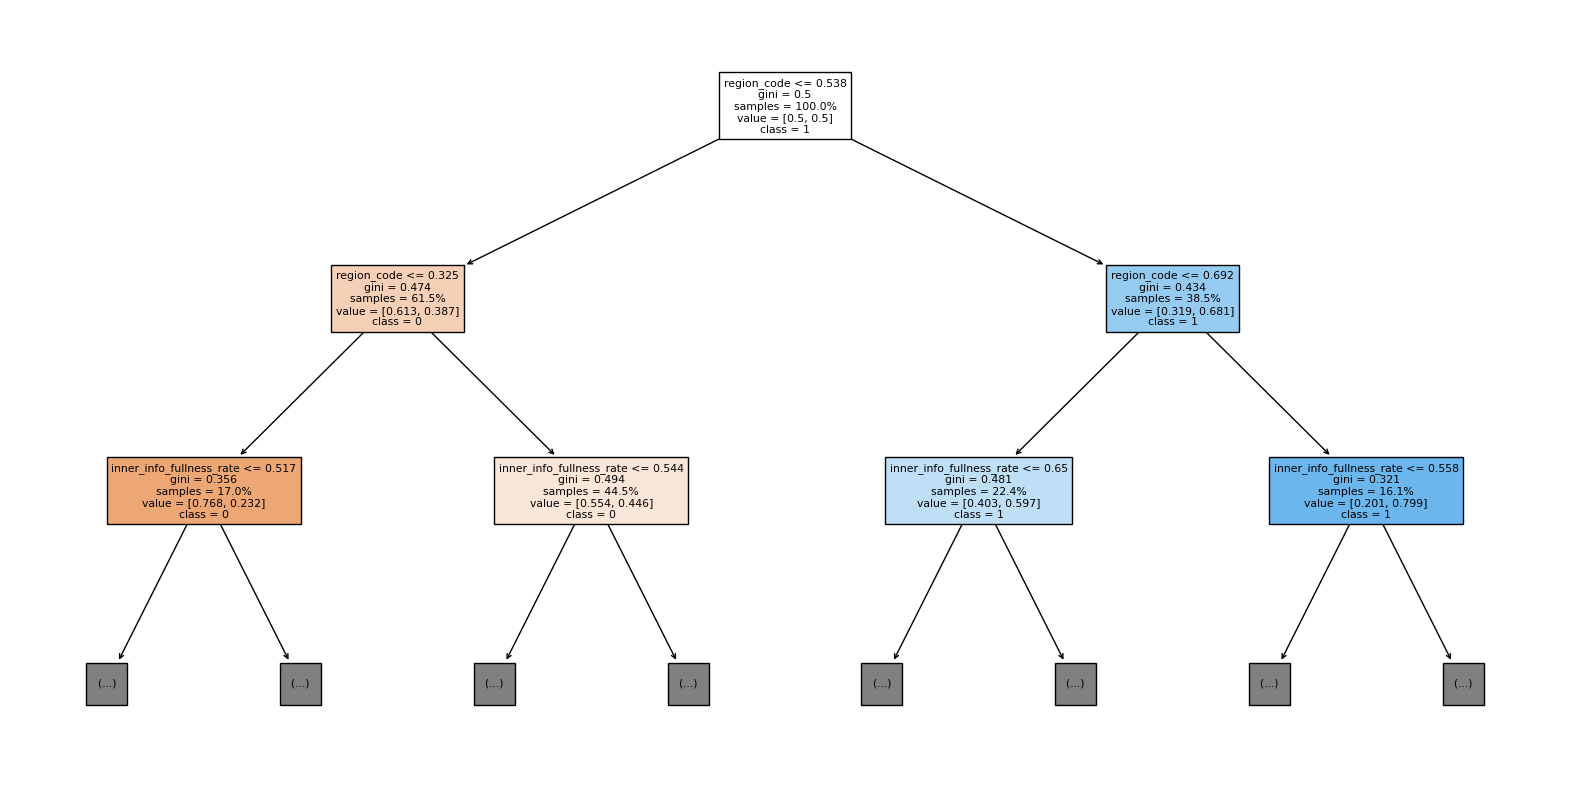

In [254]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Создание и обучение модели дерева решений
dt = DecisionTreeClassifier()
dt.fit(X_train_tree, y_train_tree)

# Предсказание на тестовой выборке и оценка точности
y_pred_tree = dt.predict(X_test_tree)
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
print(f'Accuracy: {accuracy_tree:.7f}')

# Классификационный отчет
print(classification_report(y_test_tree, y_pred_tree))

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(dt, max_depth=2, filled=True, feature_names=X_train_tree.columns, class_names=['0', '1'], proportion=True)
plt.show()